### Model
#### Group 12
##### Amir Kamarleddine
##### Ernani Fantinatti
##### Mohammed Ibraheem

In [8]:
#Importing libraries

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, BatchNormalization
import numpy as np
import glob


In [34]:
#Choose whether you will run the ETL or not

choice = 0; #1 will run the ETL

#If choice is one, choose the portion size of train and test

SIZE = 10000

print("test size is:", SIZE)
print("train size is:", int(SIZE+SIZE*0.2))


test size is: 10000
train size is: 12000


In [21]:
if choice == 1:
  files_no = glob.glob('normal/*.csv')
  folders_im = glob.glob('imbalance/*')
  train_data = np.empty((0,8), float)
  test_data = np.empty((0,8), float)
  for f_on in files_no:
    source_data = np.loadtxt(f_on, delimiter=",")
    train_data = np.append(train_data, source_data[0:SIZE,:], axis=0)
    test_data = np.append(test_data, source_data[SIZE:int(SIZE+SIZE*0.2),:], axis=0)

  n_train_labels = len(train_data)
  n_test_labels = len(test_data)
  
  for folder in folders_im:
    files_im = glob.glob( folder +'/*.csv')
    for f_im in files_im:
      source_data = np.loadtxt(f_im, delimiter=",")
      train_data = np.append(train_data, source_data[0:SIZE,:], axis=0)
      test_data = np.append(test_data, source_data[SIZE:int(SIZE+SIZE*0.2),:], axis=0)
  
  np.savetxt("train_data.csv", train_data, delimiter=",")
  np.savetxt("test_data.csv", test_data, delimiter=",")
  
  train_label = np.zeros(n_train_labels)
  train_label = np.append(train_label, np.ones(len(train_data)-n_train_labels), axis=0)
  test_label = np.zeros(n_test_labels)
  test_label = np.append(test_label, np.ones(len(test_data)-n_test_labels), axis=0)
  
  np.savetxt("train_label.csv", train_label, delimiter=",")
  np.savetxt("test_label.csv", test_label, delimiter=",")
  print("Finished parsing the files")

else:
  print("Skipping this step...")


Skipping this step...


In [22]:
if choice == 0:
  train_data = np.loadtxt('train_data.csv', delimiter=",")
  test_data = np.loadtxt('test_data.csv', delimiter=",")
  train_label = np.loadtxt('train_label.csv', delimiter=",")
  test_label = np.loadtxt('test_label.csv', delimiter=",")
  print("Loaded data files...")

else:
  print("Skipped loading files...")


Loaded data files...


In [23]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_data = scaler.fit_transform(train_data)
test_data = scaler.fit_transform(test_data)


In [24]:
train_data.shape


(3820000, 8)

In [25]:
test_data.shape


(764000, 8)

In [26]:
model2 = Sequential()
model2.add(LSTM(12, input_shape=(1, 8),activation='tanh', recurrent_activation='hard_sigmoid',return_sequences=True, return_state=False)) 
model2.add(BatchNormalization())
model2.add(LSTM(8, activation='tanh', recurrent_activation='hard_sigmoid'))
model2.add(BatchNormalization())
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 12)             1008      
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 12)             48        
_________________________________________________________________
lstm_1 (LSTM)                (None, 8)                 672       
_________________________________________________________________
batch_normalization_1 (Batch (None, 8)                 32        
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 1,769
Trainable params: 1,729
Non-trainable params: 40
_________________________________________________________________


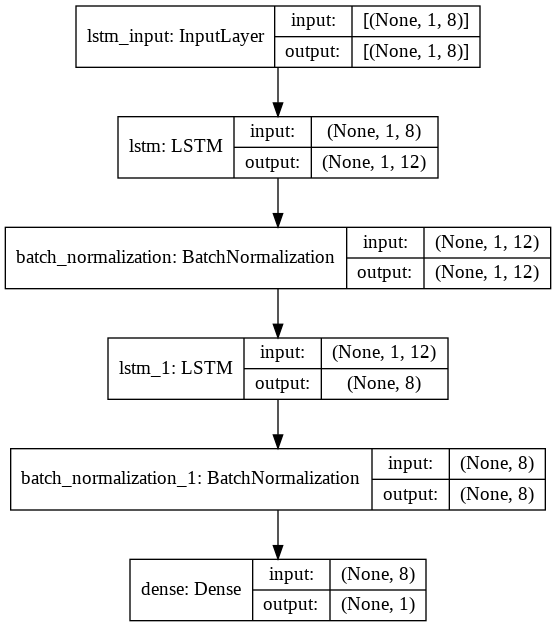

In [27]:
from keras.utils.vis_utils import plot_model
plot_model(model2, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [28]:
train_LSTM = train_data.reshape((train_data.shape[0], 1, train_data.shape[1]))
test_LSTM = test_data.reshape((test_data.shape[0], 1, test_data.shape[1]))


In [29]:
history2 = model2.fit(train_LSTM, train_label, epochs=5, batch_size=32, validation_data=(test_LSTM, test_label), verbose=2, shuffle=False)


Epoch 1/5
119375/119375 - 544s - loss: 0.0161 - accuracy: 0.9968 - val_loss: 2.2781 - val_accuracy: 0.8717
Epoch 2/5
119375/119375 - 516s - loss: 0.0252 - accuracy: 0.9962 - val_loss: 2.2531 - val_accuracy: 0.8717
Epoch 3/5
119375/119375 - 516s - loss: 0.0140 - accuracy: 0.9980 - val_loss: 2.2632 - val_accuracy: 0.8717
Epoch 4/5
119375/119375 - 512s - loss: 0.0114 - accuracy: 0.9984 - val_loss: 2.2385 - val_accuracy: 0.8717
Epoch 5/5
119375/119375 - 514s - loss: 0.0100 - accuracy: 0.9987 - val_loss: 2.2302 - val_accuracy: 0.8717


In [30]:
accuracy2 = model2.evaluate(train_LSTM, train_label)


119375/119375 [==============================] - 235s 2ms/step - loss: 2.2405 - accuracy: 0.8717


In [31]:
test_accuracy2 = model2.evaluate(test_LSTM, test_label)


23875/23875 [==============================] - 47s 2ms/step - loss: 2.2302 - accuracy: 0.8717
